The objective is to analyze Gun Deaths in the US from 2012-2014.

Each row in the dataset represents one death incident.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
%matplotlib inline

# Understanding of The Data

In [2]:
# Read in the data

gun_deaths = pd.read_csv('./Data/guns.csv')
gun_deaths.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [3]:
# Drop the first column

gun_deaths.drop('Unnamed: 0', axis=1, inplace=True)
gun_deaths.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [4]:
# Get number of rows and columns in the dataset

gun_deaths.shape

(100798, 10)

In [5]:
# Get a sense of the data

gun_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 10 columns):
year         100798 non-null int64
month        100798 non-null int64
intent       100797 non-null object
police       100798 non-null int64
sex          100798 non-null object
age          100780 non-null float64
race         100798 non-null object
hispanic     100798 non-null int64
place        99414 non-null object
education    100745 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 7.7+ MB


In [6]:
# Create dictionary from Series

gun_deaths.year.value_counts().to_dict()

{2012: 33563, 2013: 33636, 2014: 33599}

# Gun Deaths By Month

In [7]:
def date_format(row):
    """
    This function is used to create a new column from both year and month column
    so that we can use the timeline to analyze gun deaths.
    """
    yr = row[0]
    mt = row[1]
    yr_mt = dt.datetime(year=yr, month=mt, day=1)
    formatted_datetime = yr_mt.strftime("%Y-%m-%d")
    return yr_mt


# Apply the function to create a new date column

gun_deaths['new_date'] = gun_deaths.apply(date_format, axis=1)
gun_deaths.head()

,year,month,intent,police,sex,age,race,hispanic,place,education,new_date
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0,2012-01-01
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0,2012-01-01
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0,2012-01-01
3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0,2012-02-01
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0,2012-02-01


In [8]:
# Drop original year and month columns

gun_deaths_clean = gun_deaths.drop(['year', 'month'], axis=1)

# Reorder columns 

cols = gun_deaths_clean.columns.tolist()
cols_reorder = [cols[-1]]
cols_p1 = [cols[:-1]]
cols_reorder.extend(*cols_p1)
gun_deaths_clean = gun_deaths_clean.reindex(columns=cols_reorder)
gun_deaths_clean.head()

,new_date,intent,police,sex,age,race,hispanic,place,education
0,2012-01-01,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012-01-01,Suicide,0,F,21.0,White,100,Street,3.0
2,2012-01-01,Suicide,0,M,60.0,White,100,Other specified,4.0
3,2012-02-01,Suicide,0,M,64.0,White,100,Home,4.0
4,2012-02-01,Suicide,0,M,31.0,White,100,Other specified,2.0


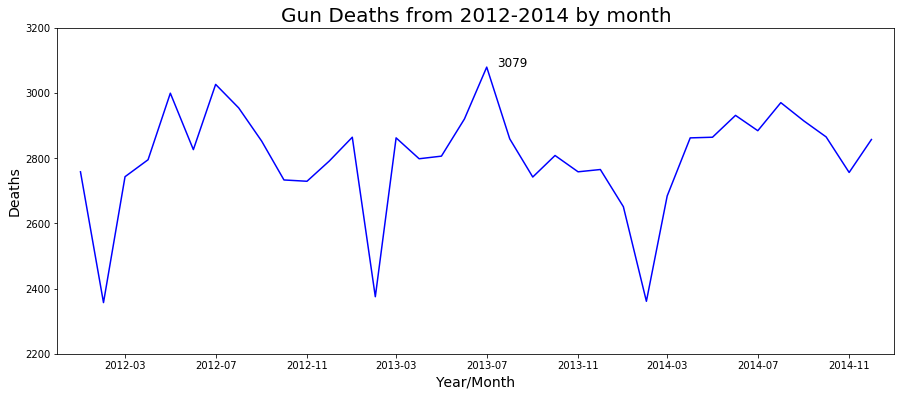

In [9]:
# Get deaths by month and plot the graph

deaths_by_month = gun_deaths_clean.new_date.value_counts()
dbm_ordered = deaths_by_month.sort_index()

plt.figure(figsize=(15,6))
plt.plot(dbm_ordered.index, dbm_ordered.values, c='blue')
plt.title('Gun Deaths from 2012-2014 by month', fontsize=20)
plt.xlim('2011-12-01', '2015-01-01')
plt.ylim(2200, 3200)
plt.xlabel('Year/Month', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.annotate(max(dbm_ordered.values), xy=('2013-07-15', 3080), fontsize=12)
plt.show()

The number of deaths related to gun violence reached its peak of 3079 in July 2013 during 2012-14.

One interesting trend to notice is that the deaths started to decline dramatically around January each year and reached the bottom in February, before which the monthly deaths started to rise again in March.

# Gun Deaths By Race

In [10]:
# Create deaths by race dictionary

deaths_by_race_dict = gun_deaths_clean.race.value_counts().to_dict()
deaths_by_race_dict

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

In [11]:
# The original dataset does not contain information about census data. Census data gives the information needed for this analysis
# Read in census data for each race

census = pd.read_csv('./Data/census.csv')
census

,Id,Year,Id.1,Sex,Id.2,Hispanic Origin,Id.3,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
0,cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,NaN,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195


In [12]:
# Keep race data

race_census = census.iloc[:, -7:-1]
race_census

,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander
0,197318956,44618105,40250635,3739506,15159516,674625


Create dictionary to store census data for each race to make calculation easier.

In order to calculate deaths by race per 100,000 people, keys from both dictionary have to be consistent. Thus, making sure keys are identical is the next step.

In [13]:
# Create dictionary to store census data by race 

cols = race_census.columns.tolist()
cols

['Race Alone - White',
 'Race Alone - Hispanic',
 'Race Alone - Black or African American',
 'Race Alone - American Indian and Alaska Native',
 'Race Alone - Asian',
 'Race Alone - Native Hawaiian and Other Pacific Islander']

In [14]:
# Only keep the part after '-'

cols_clean = [c.split('-')[-1].strip() for c in cols]
cols_clean

['White',
 'Hispanic',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander']

In [15]:
# Construct the dictionary

race_census_dict = {}
for i, c in enumerate(cols):
    race_census_dict[cols_clean[i]] = race_census.loc[0, c]
race_census_dict

{'American Indian and Alaska Native': 3739506,
 'Asian': 15159516,
 'Black or African American': 40250635,
 'Hispanic': 44618105,
 'Native Hawaiian and Other Pacific Islander': 674625,
 'White': 197318956}

In [16]:
# Unify the keys in both dictionaries

race_census_dict['Asian/Pacific Islander'] = race_census_dict['Asian'] + race_census_dict['Native Hawaiian and Other Pacific Islander']
race_census_dict.pop('Asian')
race_census_dict.pop('Native Hawaiian and Other Pacific Islander')

race_census_dict['Black'] = race_census_dict['Black or African American']
race_census_dict.pop('Black or African American')

race_census_dict['Native American/Native Alaskan'] = race_census_dict['American Indian and Alaska Native']
race_census_dict.pop('American Indian and Alaska Native')

race_census_dict

{'Asian/Pacific Islander': 15834141,
 'Black': 40250635,
 'Hispanic': 44618105,
 'Native American/Native Alaskan': 3739506,
 'White': 197318956}

In [17]:
# Death rate by race per 100,000 people

per_race_death_rate = {}
for i in race_census_dict.keys():
    per_race_death_rate[i] = deaths_by_race_dict[i] / race_census_dict[i] * 100000
    
per_race_death_rate

{'Asian/Pacific Islander': 8.374309664161762,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907,
 'Native American/Native Alaskan': 24.521955573811088,
 'White': 33.56849303419181}

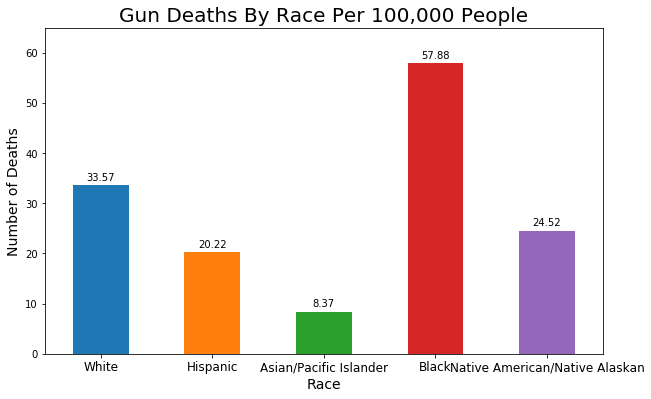

In [18]:
# Unpack the dictionary to create series
x_labels, x_values = zip(*per_race_death_rate.items())
freq_series = pd.Series.from_array(x_values)

# Make visualization
plt.figure(figsize=(10, 6))
ax = freq_series.plot(kind='bar')
ax.set_title("Gun Deaths By Race Per 100,000 People", fontsize=20)
ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Deaths", fontsize=14)
ax.set_xticklabels(x_labels, rotation=0, fontsize=12)
ax.set_ylim(0, 65)

rects = ax.patches

# Place a label on each bar
for rect in rects:
    # Get X and Y placement of label from rect
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5

    # Use Y value as label and format number with two decimal place
    label = "{:.2f}".format(y_value)

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center')

It's obvious that Black people suffer more gun deaths during 2012-14. followed by the Whites with 33.57 deaths in 100,000 people. Asians and Pacific Islanders have the lowest death rate among all the five races.

Although I could continue use the same approach for similar analysis, the easier way is to add a column that assign count to each record.
This is because each row represents one incident. In order to calculate the sum for different criterias, it's more intuitive to use leverage a pivot table.

In [19]:
# Add additional column and assign 1 to each row to represent number of incidents

gun_deaths['count'] = 1
gun_deaths.head()

,year,month,intent,police,sex,age,race,hispanic,place,education,new_date,count
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0,2012-01-01,1
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0,2012-01-01,1
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0,2012-01-01,1
3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0,2012-02-01,1
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0,2012-02-01,1


# Link Between Month And Homicide Rate

In [20]:
pt_month_intent = gun_deaths.pivot_table(index=['month'], values=['count'], columns=['intent'], aggfunc=np.sum)
pt_month_intent

count                              
intent Accidental Homicide Suicide Undetermined
month                                          
1             152     2829    5220           72
2             127     2178    4732           56
3             134     2780    5309           66
4              98     2845    5438           73
5             115     2976    5506           72
6             112     3130    5367           68
7             149     3269    5514           57
8             164     3125    5421           73
9             118     2966    5343           81
10            131     2968    5256           51
11            160     2919    5086           78
12            179     3191    4983           60

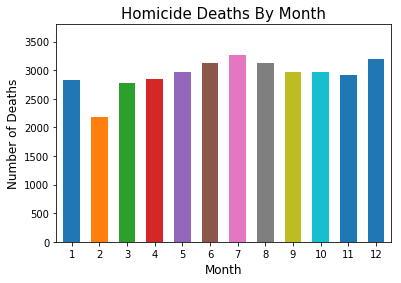

In [21]:
pt_month_intent['count']['Homicide'].plot(kind='bar', width=0.6)
plt.title('Homicide Deaths By Month', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 3800)
plt.show()

The graph does not show obvious link between month and Homicide deaths. 

# Explore The Homicide Rate By Gender

In [22]:
pt_gender_homicide = gun_deaths.pivot_table(index=['sex'], values=['count'], columns=['intent'], margins=True, aggfunc=np.sum)
pt_gender_homicide

count                                      
intent Accidental Homicide Suicide Undetermined     All
sex                                                    
F             218     5373    8689          169   14449
M            1421    29803   54486          638   86348
All          1639    35176   63175          807  100797

In [23]:
# Calculate Homicide percentage by gender

pt_gender_homicide['Homicide_Percentage'] = round(pt_gender_homicide['count']['Homicide']/pt_gender_homicide['count'].All*100, 2).astype(str)+' %'
pt_gender_homicide

count                                       Homicide_Percentage
intent Accidental Homicide Suicide Undetermined     All                    
sex                                                                        
F             218     5373    8689          169   14449             37.19 %
M            1421    29803   54486          638   86348             34.51 %
All          1639    35176   63175          807  100797              34.9 %

Female accounts for 37.19% of the total female deaths.
Male accounts for 34.51% of the total male deaths.

In [24]:
gh_dict = pt_gender_homicide['count'].loc[:, 'Homicide'].to_dict()
gh_dict

{'All': 35176, 'F': 5373, 'M': 29803}

In [25]:
male_female_homicide_ratio = gh_dict['M'] / gh_dict['F']
male_female_homicide_ratio

5.546808114647311

Male is 5.5 times more likely to be invoved in homicides than female nationwise during 2012-14.

More Questions to be solved:

1. Explore the rates of other intents, like Accidental, by gender and race.
2. Find out if gun death rates correlate to location and education.